# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.029727e+01     7.277087e+00
 * time: 0.004927873611450195
     1     2.714988e+01     6.090159e+00
 * time: 0.014632940292358398
     2     2.710517e+01     1.353371e+01
 * time: 0.03787398338317871
     3     1.732697e+01     5.975572e+00
 * time: 0.06557393074035645
     4     1.242066e+01     2.145855e+00
 * time: 0.09319901466369629
     5     1.177662e+01     3.740385e+00
 * time: 0.11169099807739258
     6     1.079531e+01     2.428641e+00
 * time: 0.1308889389038086
     7     1.027271e+01     2.621279e+00
 * time: 0.15029287338256836
     8     9.464550e+00     1.770236e+00
 * time: 0.16956090927124023
     9     8.948249e+00     1.327452e+00
 * time: 0.18882989883422852
    10     8.806555e+00     1.037333e+00
 * time: 0.2080700397491455
    11     8.680631e+00     7.621556e-01
 * time: 0.22749090194702148
    12     8.617569e+00     4.089333e-01
 * time: 0.24246001243591309
    13     8.595580e+00     3.253824e-01
 * time:

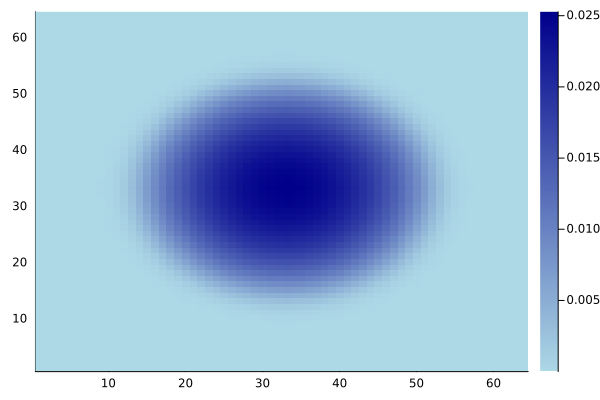

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)